<a href="https://www.kaggle.com/code/anannoasif/titanic-survival-prediction-using-nn-classifier?scriptVersionId=155549253" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [395]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [396]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [397]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [398]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [399]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [400]:
test_df['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [401]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mode()[0])

In [402]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [403]:
test_df['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [404]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [405]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [406]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


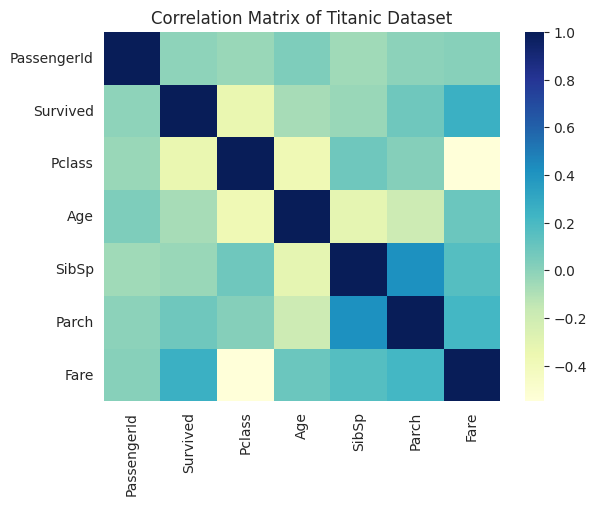

In [407]:
sns.heatmap(train_df.select_dtypes(include=['float64', 'int64']).corr(), cmap='YlGnBu', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()
plt.show()

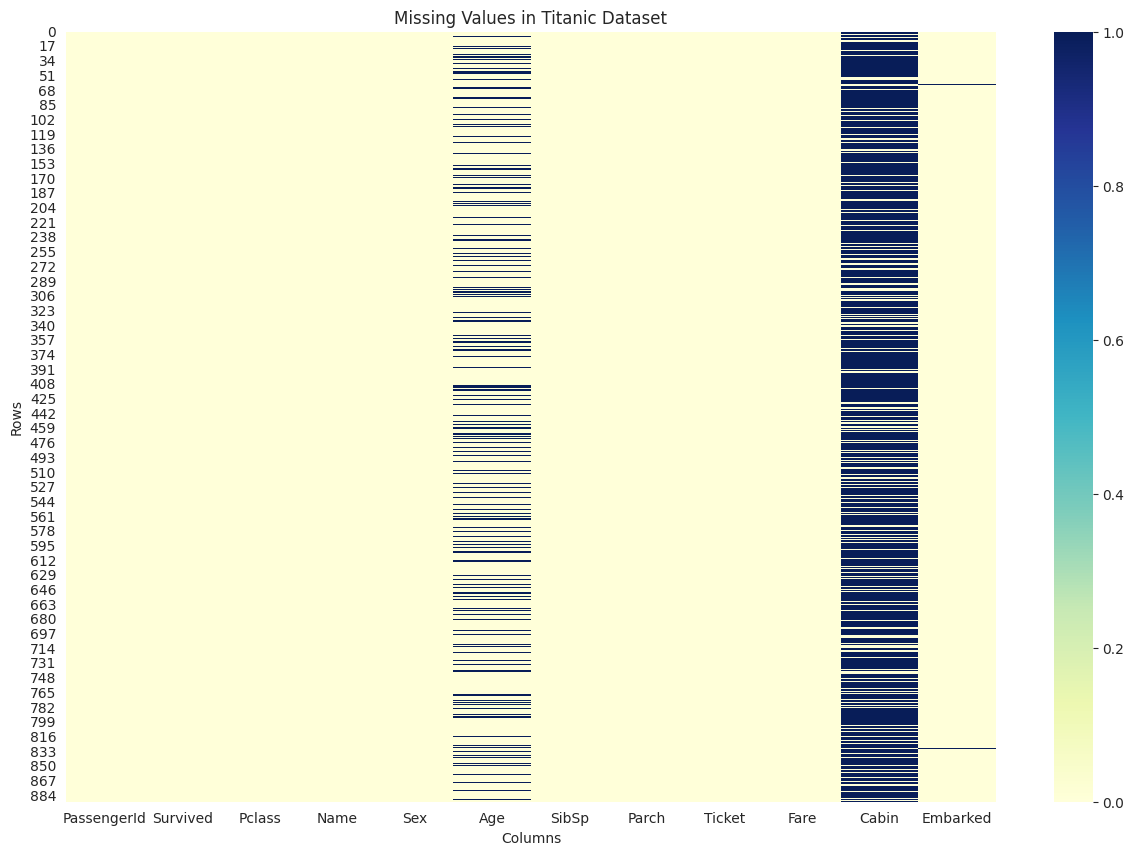

In [408]:
# Create a heatmap using Matplotlib and Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.isnull(), cmap='YlGnBu', cbar=True)
plt.title('Missing Values in Titanic Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [409]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

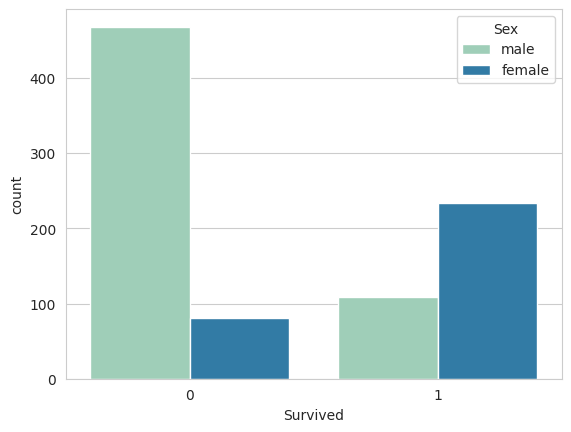

In [410]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train_df, palette = 'YlGnBu')

<Axes: xlabel='Survived', ylabel='count'>

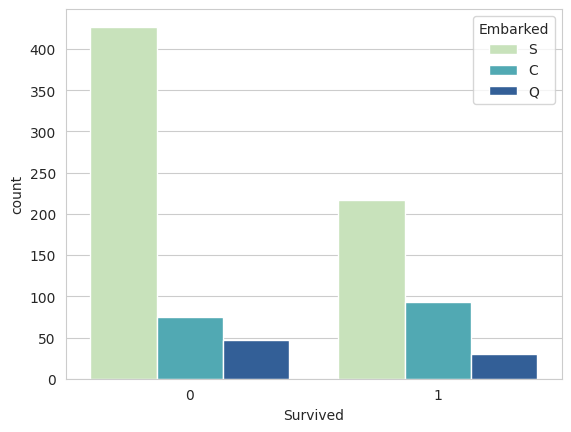

In [411]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Embarked', data = train_df, palette = 'YlGnBu')

<Axes: xlabel='Survived', ylabel='count'>

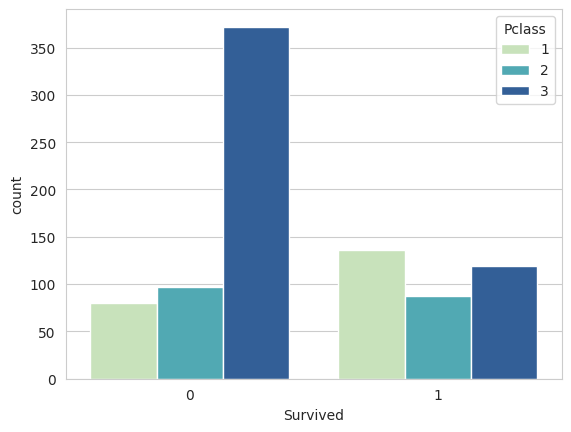

In [412]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_df, palette = 'YlGnBu')

In [413]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [414]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [415]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [416]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [417]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [418]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

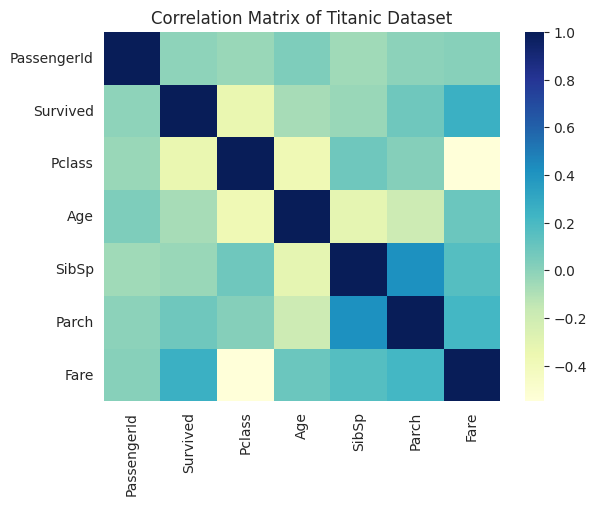

In [419]:
sns.heatmap(train_df.select_dtypes(include=['float64', 'int64']).corr(), cmap='YlGnBu', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()
plt.show()

In [420]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [421]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [422]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


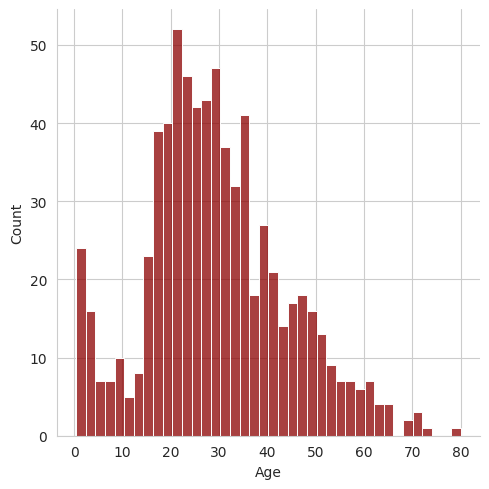

In [423]:
sns.displot(train_df['Age'].dropna(), kde = False, color = 'darkred', bins =40)

<Axes: xlabel='SibSp', ylabel='count'>

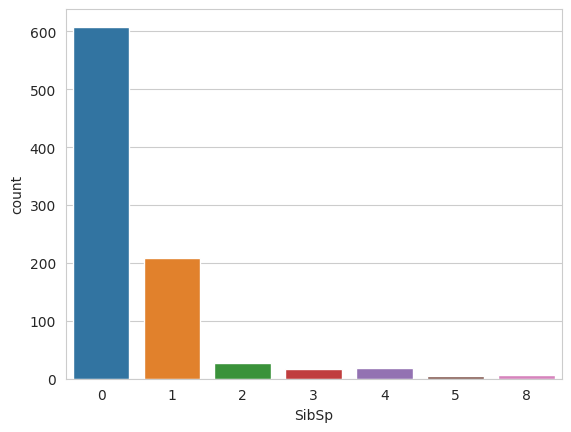

In [424]:
sns.countplot(x = 'SibSp', data = train_df)

In [425]:
train_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<Axes: xlabel='Pclass', ylabel='Age'>

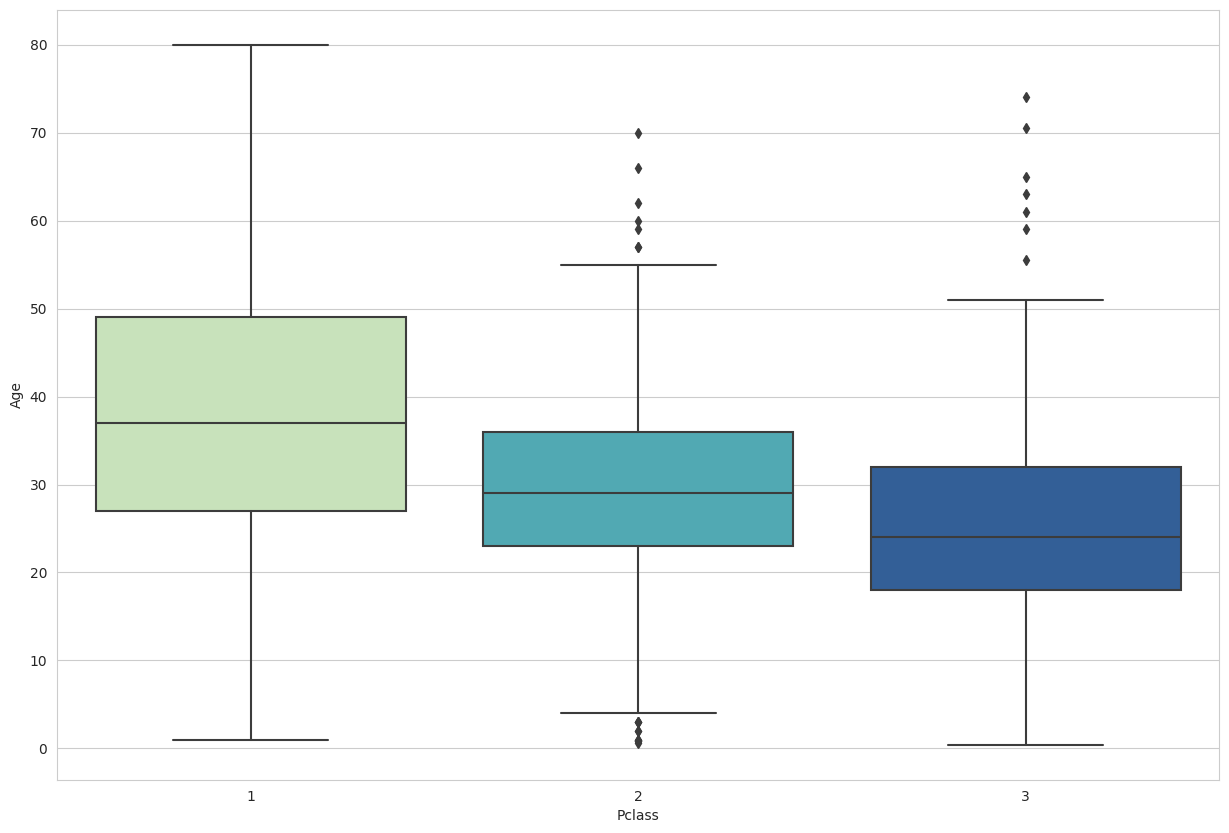

In [426]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y='Age', data=train_df, palette = 'YlGnBu')

In [427]:
def impage(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isna(Age):

        if Pclass == 1:
            return 35
        elif Pclass == 2:
            return 27
        elif Pclass ==3:
            return 25
    else:
        return Age

In [428]:
train_df['Age'] = train_df[['Age', 'Pclass']].apply(impage, axis=1)

/tmp/ipykernel_42/325891784.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_42/325891784.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [429]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [430]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<Axes: xlabel='Pclass', ylabel='Age'>

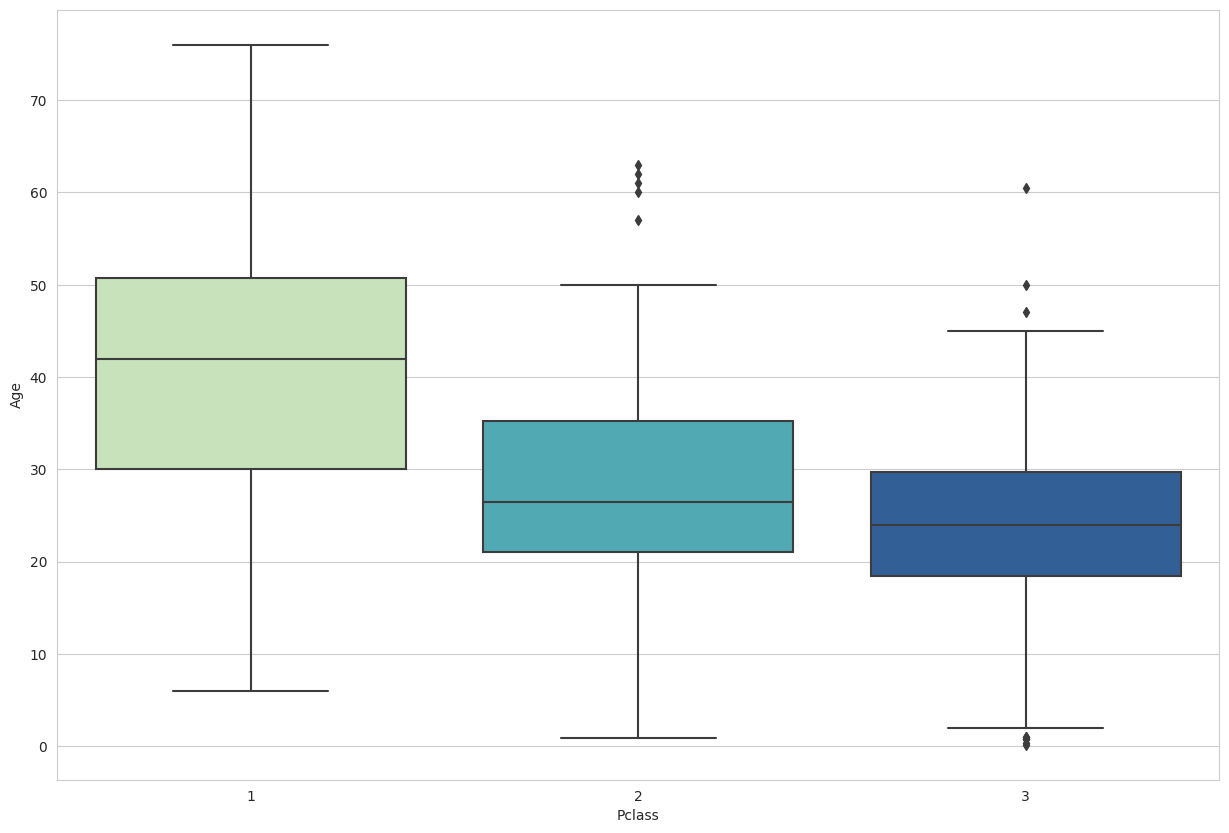

In [431]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y='Age', data=test_df, palette = 'YlGnBu')

In [432]:
def impage2(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isna(Age):

        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 25
        elif Pclass ==3:
            return 23
    else:
        return Age

In [433]:
test_df['Age'] = test_df[['Age', 'Pclass']].apply(impage2, axis=1)

/tmp/ipykernel_42/2096748954.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_42/2096748954.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [434]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [435]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [436]:
df = pd.concat([train_df, test_df])

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [438]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'SibSp'], axis =1)

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1307 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


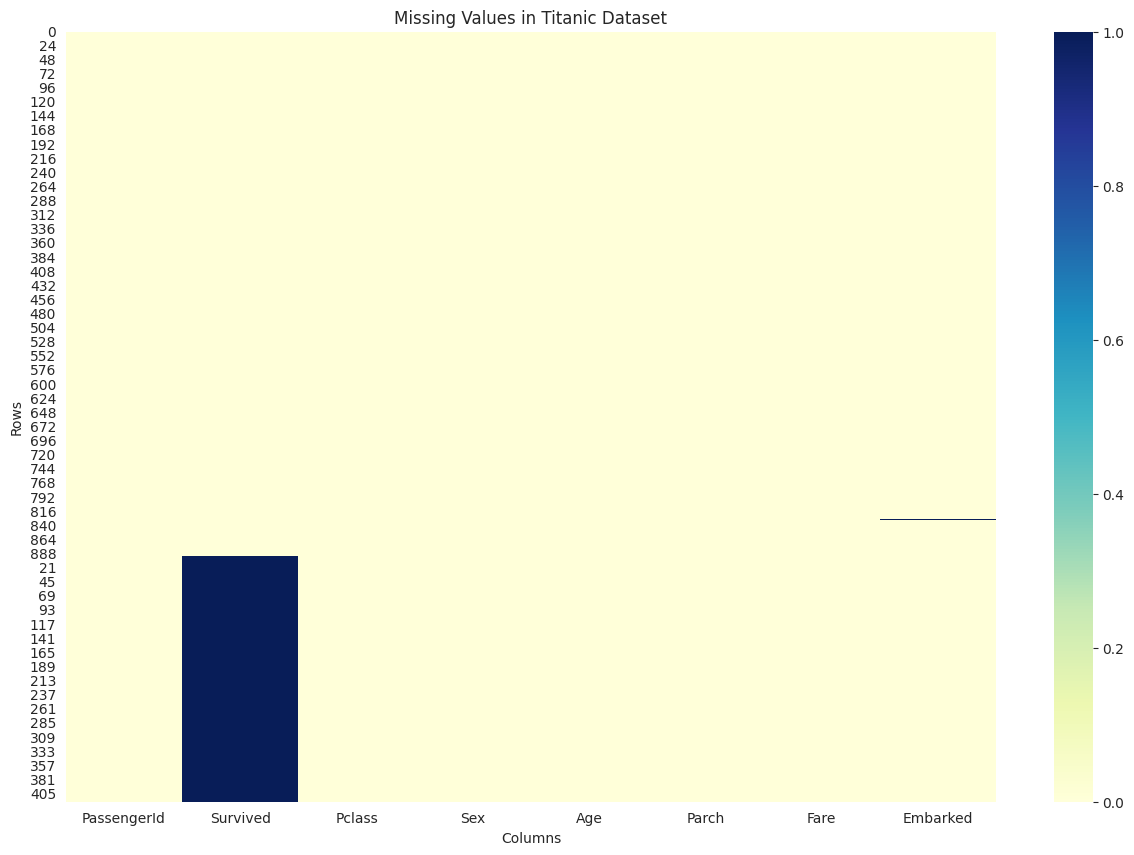

In [440]:
# Create a heatmap using Matplotlib and Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cmap='YlGnBu', cbar=True)
plt.title('Missing Values in Titanic Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1307 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


In [442]:
df['Embarked'].info()

<class 'pandas.core.series.Series'>
Index: 1309 entries, 0 to 417
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
1307 non-null   object
dtypes: object(1)
memory usage: 20.5+ KB


In [443]:
df['Embarked'].isna().sum()

2

In [444]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
61,62,1.0,1,female,38.0,0,80.0,NaN
829,830,1.0,1,female,62.0,0,80.0,NaN


<Axes: xlabel='Embarked', ylabel='Fare'>

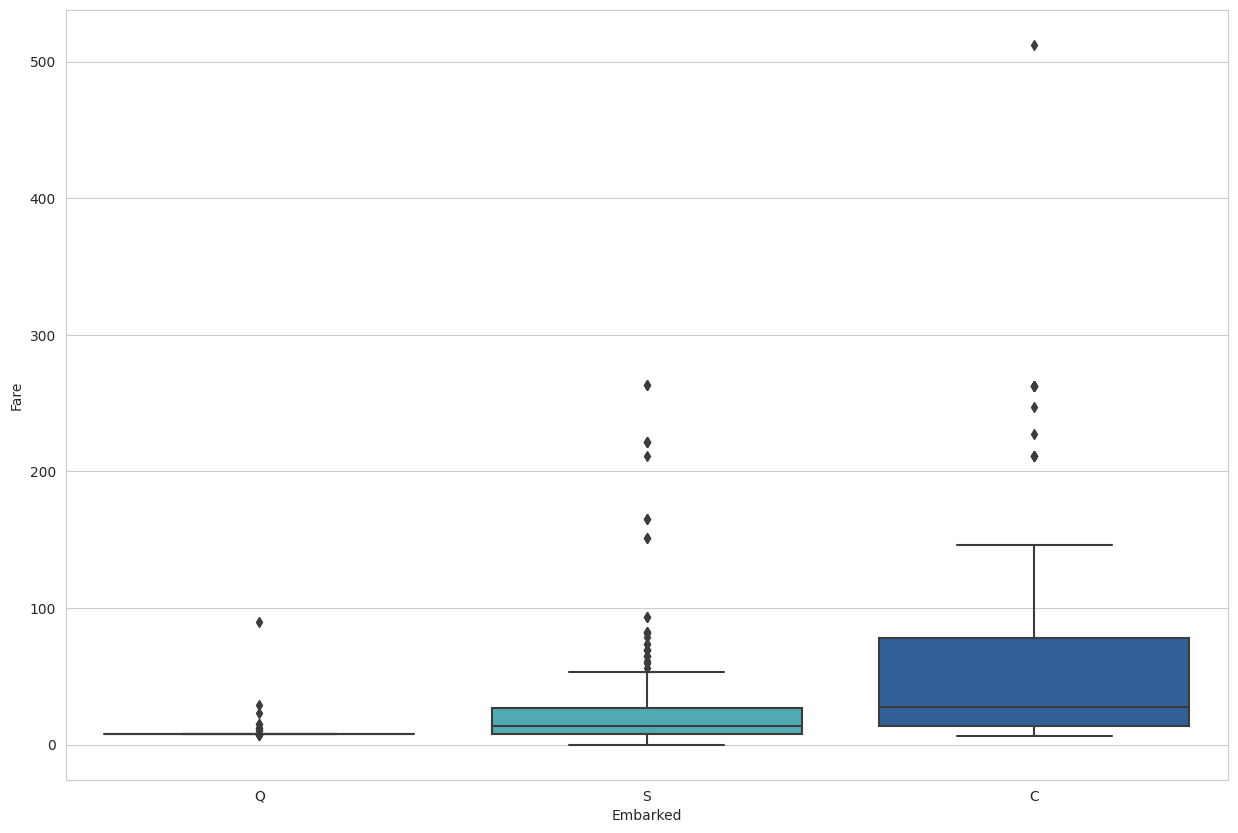

In [445]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Embarked', y='Fare', data=test_df, palette = 'YlGnBu')

In [446]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [447]:
def impage3(cols):
    Embarked = cols[0]
    Fare = cols[1]

    if pd.isna(Embarked):

        if Fare == 80:
            return 'C'
    else:
        return Embarked

In [448]:
df['Embarked'] = df[['Embarked', 'Fare']].apply(impage3, axis=1)

/tmp/ipykernel_42/3841591460.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Embarked = cols[0]
/tmp/ipykernel_42/3841591460.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Fare = cols[1]


In [449]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [450]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

# df['Ticket']=labelencoder.fit_transform(df['Ticket'])
df['Embarked']=labelencoder.fit_transform(df['Embarked'])
df['Sex']=labelencoder.fit_transform(df['Sex'])

In [451]:
# df = df.drop('Ticket', axis = 1)

In [452]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,0,7.2500,2
1,2,1.0,1,0,38.0,0,71.2833,0
2,3,1.0,3,0,26.0,0,7.9250,2
3,4,1.0,1,0,35.0,0,53.1000,2
4,5,0.0,3,1,35.0,0,8.0500,2


In [453]:
df['Embarked'].info()

<class 'pandas.core.series.Series'>
Index: 1309 entries, 0 to 417
Series name: Embarked
Non-Null Count  Dtype
--------------  -----
1309 non-null   int64
dtypes: int64(1)
memory usage: 20.5 KB


In [454]:
df['Embarked'].unique()

array([2, 0, 1])

In [455]:
df['Sex'].unique()

array([1, 0])

In [456]:
df_test = df[df['Survived'].isnull()]
df_train = df[~df['Survived'].isnull()]

In [457]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [458]:
df_test.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [459]:
X = df_train.drop('Survived', axis = 1 )
X.tail()


,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked
886,887,2,1,27.0,0,13.00,2
887,888,1,0,19.0,0,30.00,2
888,889,3,0,25.0,2,23.45,2
889,890,1,1,26.0,0,30.00,0
890,891,3,1,32.0,0,7.75,1


In [460]:
y = df_train['Survived']
y.tail()

886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, dtype: float64

In [461]:
Xt = df_test.drop('Survived', axis = 1)
Xt.tail()

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked
413,1305,3,1,23.0,0,8.0500,2
414,1306,1,0,39.0,0,108.9000,0
415,1307,3,1,38.5,0,7.2500,2
416,1308,3,1,23.0,0,8.0500,2
417,1309,3,1,23.0,1,22.3583,0


In [462]:
yt = df_test['Survived']
yt.tail()

413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Survived, dtype: float64

In [463]:
### Building a model

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Make device agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [464]:
X = df_train.drop('Survived', axis = 1 )
y = df_train['Survived']

In [465]:
# Standardize features
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X_t = scaler.fit_transform(Xt)

In [466]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [467]:
# Convert data to NumPy arrays
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)
X_t_np =  np.array(X_t)

In [468]:
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_np)
y_train_tensor = torch.LongTensor(y_train_np)
X_test_tensor = torch.FloatTensor(X_test_np)
y_test_tensor = torch.LongTensor(y_test_np)
X_t_tensor = torch.FloatTensor(X_t_np)

In [469]:
class TitanicNN(nn.Module):
    def __init__(self, input_size):
        super(TitanicNN, self).__init__()

        self.fc1 = nn.Linear(in_features=X.shape[1], out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=256)
        self.fc4 = nn.Linear(in_features=256, out_features=512)
        self.fc5 = nn.Linear(in_features=512, out_features=1024)
        self.fc6 = nn.Linear(in_features=1024, out_features=512)
        self.fc7 = nn.Linear(in_features=512, out_features=256)
        self.fc8 = nn.Linear(in_features=256, out_features=128)
        self.fc9 = nn.Linear(in_features=128, out_features=64)
        self.fc10 = nn.Linear(in_features=64, out_features=32)
        self.fc11 = nn.Linear(in_features=32, out_features=8)
        self.output = nn.Linear(in_features=8, out_features=2)

    def forward(self, x):
        z = F.silu(self.fc1(x))
        z = F.silu(self.fc2(z))
        z = F.silu(self.fc3(z))
        z = F.silu(self.fc4(z))
        z = F.silu(self.fc5(z))
        z = F.silu(self.fc6(z))
        z = F.silu(self.fc7(z))
        z = F.silu(self.fc8(z))
        z = F.silu(self.fc9(z))
        z = F.silu(self.fc10(z))
        z = F.silu(self.fc11(z))
        z = F.logsigmoid(self.output(z))
        return z

In [470]:
# Initialize the model
input_size = X_train.shape[1]
model = TitanicNN(input_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00003)


In [471]:
# Lists to store training and validation losses

train_losses = []  # To store training losses
test_losses = []   # To store validation losses
accuracies = []    # To store accuracies

In [472]:
seed_value = 42

# Set seed for PyTorch
torch.manual_seed(seed_value)

# Training the model

epochs = 250        # Number of epochs for training
batch_size = 32     # Size of each batch

for epoch in range(epochs):

    running_loss = 0.0  # Tracks the cumulative loss within an epoch
    for i in range(0, len(X_train_tensor), batch_size):
        optimizer.zero_grad()             # Zero the gradients
        outputs = model(X_train_tensor[i:i+batch_size])  # Get predictions for the batch
        loss = criterion(outputs, y_train_tensor[i:i+batch_size])  # Calculate loss for the batch
        loss.backward()                  # Backpropagation
        optimizer.step()                 # Optimizer step (update weights)
        running_loss += loss.item()      # Accumulate loss for this batch

    # Calculate and store training loss

    train_loss = running_loss / (len(X_train_tensor) / batch_size)  # Calculate average training loss per batch
    train_losses.append(train_loss)                                 # Store the training loss

    # Calculate validation loss
    test_loss = criterion(model(X_test_tensor), y_test_tensor).item()  # Calculate validation loss
    test_losses.append(test_loss)                                     # Store validation loss

    with torch.no_grad():
        model.eval()                            # Set the model to evaluation mode
        outputs = model(X_test_tensor)          # Get predictions for the test data
        predicted = torch.max(outputs, 1)[1]    # Get the predicted classes
        accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)  # Calculate accuracy
        accuracies.append(accuracy)             # Store accuracy


    # Print and plot losses
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss}, Test Loss: {test_loss}, Accuracy: {accuracy * 100}%')


Epoch [1/250], Train Loss: 0.7279509078250842, Test Loss: 0.7030103802680969, Accuracy: 39.66480446927375%
Epoch [11/250], Train Loss: 0.5995563496364636, Test Loss: 0.5789068341255188, Accuracy: 60.33519553072626%
Epoch [21/250], Train Loss: 0.5582031051764328, Test Loss: 0.5449861288070679, Accuracy: 72.62569832402235%
Epoch [31/250], Train Loss: 0.5513312053144648, Test Loss: 0.5408997535705566, Accuracy: 81.00558659217877%
Epoch [41/250], Train Loss: 0.5472772777750251, Test Loss: 0.5391904711723328, Accuracy: 79.3296089385475%
Epoch [51/250], Train Loss: 0.544117344899124, Test Loss: 0.5377163290977478, Accuracy: 79.88826815642457%
Epoch [61/250], Train Loss: 0.5412729724069659, Test Loss: 0.5359073877334595, Accuracy: 80.44692737430168%
Epoch [71/250], Train Loss: 0.5383166530159083, Test Loss: 0.5333678126335144, Accuracy: 80.44692737430168%
Epoch [81/250], Train Loss: 0.5345267352093471, Test Loss: 0.5293309688568115, Accuracy: 80.44692737430168%
Epoch [91/250], Train Loss: 0.5

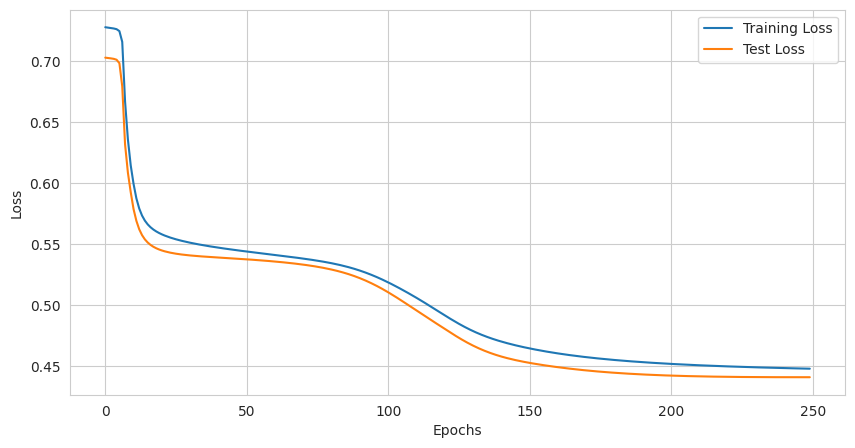

In [473]:

# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
